# Analyzing weather data

<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">

This notebook is an element of the [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).

Author: Eric Marsden <eric.marsden@risk-engineering.org>. 

---

This notebook contains an introduction to use of Python, pandas and SciPy for basic analysis of weather data. It contains no contributions to meteorological science, but illustrates how to generate simple plots and basic model fitting to some real physical observations.
See the [associated course materials](https://risk-engineering.org/statistical-modelling/) for background information and to download this content as a Jupyter/Python notebook.

In [1]:
import numpy
import scipy.stats
import pandas
import matplotlib.pyplot as plt
plt.style.use("bmh")

Let’s download and import some data on weather conditions in 2013 at Toulouse airport (official code name is “LFBO”), from the `wunderground.com` web site, using the pandas library. (For convenience, because access to historical data requires you to create an account, we have downloaded data for 2013, cleaned it up a little, and uploaded to the `risk-engineering.org` website.) We then look at the first few lines of data, using the `head` method of the pandas dataframe.

In [2]:
data = pandas.read_csv("https://risk-engineering.org/static/data/TLS-weather-data-2013.csv")
data.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-1-1,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-1-2,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2,2013-1-3,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
3,2013-1-4,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-1-5,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306


The `columns` field of the dataframe provides access to the names of the columns.

In [3]:
data.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

## Data consistency checks

It is good practice to run a few checks on your data, to make sure that you understand how the columns are encoded and to check things look sensible. A simple way of writing such checks in Python is to use the `assert` function to write a few assertions. If an assertion fails, Python will print an error.

We can check that the number of days for which we have data is a plausible number of days in a year. We can check that on each day, the maximum recorded temperature is larger than the mean and the minimum for that day, and likewise for the recorded wind speeds. We can also check that all wind speeds are positive.

In [4]:
assert(0 < len(data) <= 365)
for index, day in data.iterrows():
    assert(day["Max TemperatureC"] >= day["Mean TemperatureC"] >= day["Min TemperatureC"])
    assert(day["Max Wind SpeedKm/h"] >= day["Mean Wind SpeedKm/h"] >= 0)
    assert(360 >= day["WindDirDegrees"] >= 0)

What was the lowest temperature measured in 2013?

In [5]:
def FahrenheitToCelsius(F): 
    return (F - 32) * 5 / 9.0
# as a basic test, check that our Fahrenheit and Celsius scales intersect at -40
FahrenheitToCelsius(-40)

-40.0

In [6]:
data["Min TemperatureC"].min()

-7

Let's look at how the mean daily temperature changed over the year.

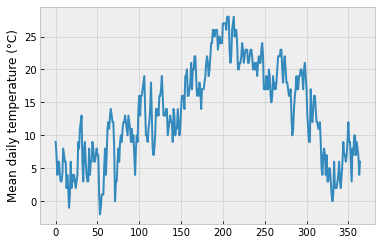

In [7]:
plt.plot(data["Mean TemperatureC"])
plt.ylabel("Mean daily temperature (°C)");

## Checking for correlation between random variables

Let's check for a correlation between various measurements, such as temperature, pressure, wind speed and visibility.

(0.007326586609780543, 0.8890582229326159)

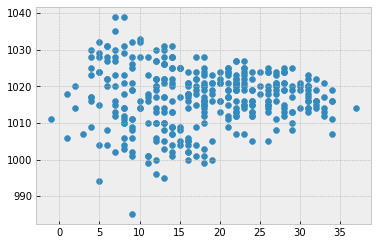

In [8]:
plt.scatter(data["Max TemperatureC"], data["Mean Sea Level PressurehPa"])
scipy.stats.pearsonr(data["Max TemperatureC"], data["Mean Sea Level PressurehPa"])

(-0.026087479441801294, 0.6193473005386982)

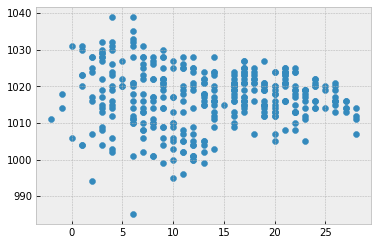

In [9]:
plt.scatter(data["Mean TemperatureC"], data["Mean Sea Level PressurehPa"]);
scipy.stats.pearsonr(data["Mean TemperatureC"], data["Mean Sea Level PressurehPa"])

(-0.17492033473927449, 0.0007899349035988623)

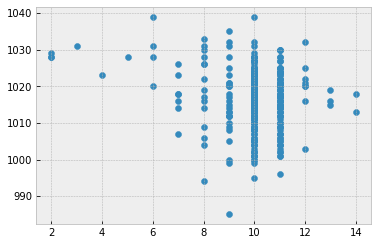

In [10]:
plt.scatter(data["Mean VisibilityKm"], data["Mean Sea Level PressurehPa"])
scipy.stats.pearsonr(data["Mean VisibilityKm"], data["Mean Sea Level PressurehPa"])

(0.2624485082208458, 3.651040787351729e-07)

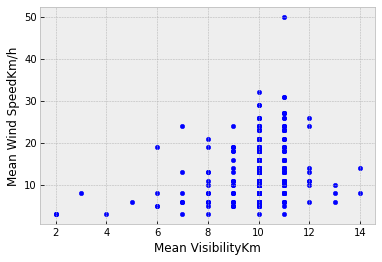

In [11]:
# this is using the plotting functionality in pandas, rather than matplotlib
data.plot(x="Mean VisibilityKm", y="Mean Wind SpeedKm/h", kind="scatter")
scipy.stats.pearsonr(data["Mean VisibilityKm"], data["Mean Wind SpeedKm/h"])

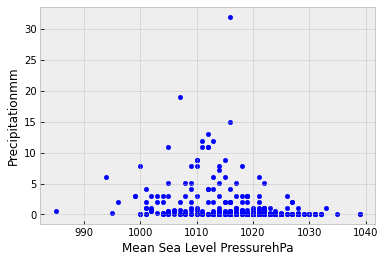

In [12]:
data.plot(x="Mean Sea Level PressurehPa", y="Precipitationmm", kind="scatter");

The [dew point](http://en.wikipedia.org/wiki/Dew_point) is the saturation temperature for water in air (the temperature at which water vapour condenses). It is associated with the temperature and with the level of humidity (exercise: check the correlation with humidity).

(0.9350261458377366, 1.571864776050358e-165)

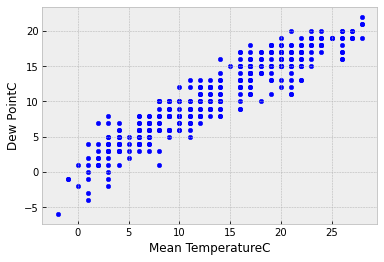

In [13]:
data.plot(x="Mean TemperatureC", y="Dew PointC", kind="scatter")
scipy.stats.pearsonr(data["Mean TemperatureC"], data["Dew PointC"])

If you are using a probabilistic model to generate weather samples for some risk calculation, it is important that your samples respect the correlation between inputs variables. Otherwise, you may be running your risk model on improbable combinations of input weather variables, and your results will be unrealistic.

## Fitting a probability distribution to data

SciPy has functionality which allows you to “fit” a probability distribution to your data. It will calculate the distribution parameters which give the best match to your data (the lowest level of error). Let’s try that first with some generated data from a normal distribution.

In [14]:
# here we generate some fake "observations"
obs = scipy.stats.norm(loc=10, scale=2).rvs(1000)
scipy.stats.norm.fit(obs)

(9.909951721855563, 2.0453839095557584)

It tells us that the best parameters for a normal distribution based on our data are a mean of 9.92 and standard deviation of 2.04 (actually, these numbers will change each time you run this notebook). Indeed, that is very close to the original parameters. We can superimpose our “fitted” normal with a histogram of the data to check the fit visually.

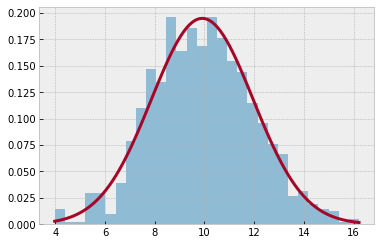

In [15]:
mu, sigma = scipy.stats.norm.fit(obs)
fitted = scipy.stats.norm(mu, sigma)
plt.hist(obs, bins=30, density=True, alpha=0.5);
x = numpy.linspace(obs.min(), obs.max(), 100)
plt.plot(x, fitted.pdf(x), lw=3);

It fits quite well. 

Let’s do the same operation on our wind speed data for Toulouse airport. Some bibliographic research indicates that wind speed is not normally distributed; it generally follows a lognormal distribution or a Weibull distribution. Let’s start by trying to fit a lognormal distribution (`scipy.stats.lognorm` in SciPy).

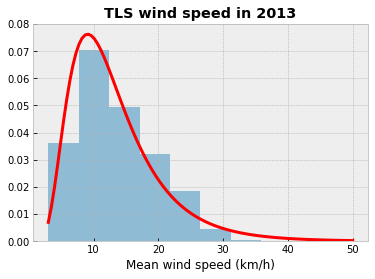

In [16]:
wind = data["Mean Wind SpeedKm/h"]
shape, loc, scale = scipy.stats.lognorm.fit(wind, floc=0)
fitted = scipy.stats.lognorm(shape, loc, scale)
plt.hist(wind, density=True, alpha=0.5)
support = numpy.linspace(wind.min(), wind.max(), 100)
plt.plot(support, fitted.pdf(support), "r-", lw=3)
plt.title("TLS wind speed in 2013", weight="bold")
plt.xlabel("Mean wind speed (km/h)");

We use a **probability plot** to check visually how well the fitted distribution fits the data. This shows quantiles from the sample plotted against quantiles from the theoretical distribution. It’s particularly important to check how it fits at the edges of the probability plot (in the tails of the distribution). We check first with a normal distribution, and see that it doesn’t fit very well for low wind speeds.

KstestResult(statistic=0.9986501019683699, pvalue=0.0)

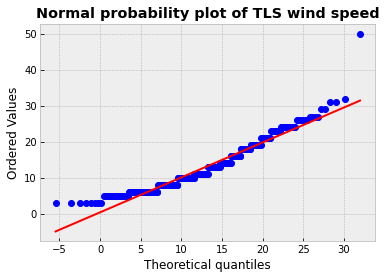

In [17]:
wind = data["Mean Wind SpeedKm/h"]
mu, sigma = scipy.stats.norm.fit(wind)
fitted = scipy.stats.norm(mu, sigma)
scipy.stats.probplot(wind, dist=fitted, plot=plt.figure().add_subplot(111))
plt.title("Normal probability plot of TLS wind speed", weight="bold")
# also run a Kolmogorov-Smirnov test to measure goodness of fit
scipy.stats.kstest(wind, "norm")

The fit is not bad, except for the tails of the distribution (low and high wind speeds). Then we check with a lognormal distribution, and see that it fits better for low wind speeds, and less well for high wind speeds.

KstestResult(statistic=0.09352227664560753, pvalue=0.0031423028181509485)

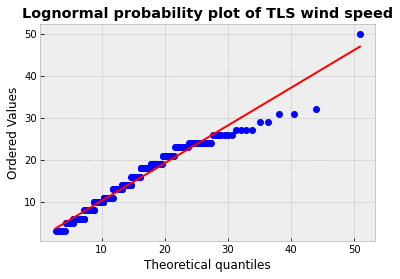

In [18]:
fitted = scipy.stats.lognorm(shape, loc, scale)
scipy.stats.probplot(wind, dist=fitted, plot=plt.figure().add_subplot(111))
plt.title("Lognormal probability plot of TLS wind speed", weight="bold")
scipy.stats.kstest(wind, "lognorm", (shape,loc,scale))

Finally, we check against a Weibull distribution.

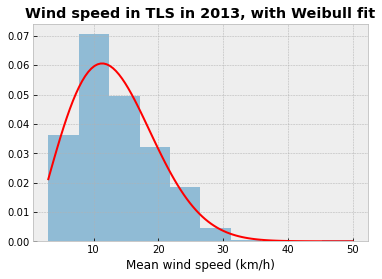

In [19]:
p0, p1, p2 = scipy.stats.weibull_min.fit(wind, floc=0)
fitted = scipy.stats.weibull_min(p0, p1, p2)
plt.hist(wind, density=True, alpha=0.5)
plt.plot(support, fitted.pdf(support), "r-", lw=2)
plt.title("Wind speed in TLS in 2013, with Weibull fit", weight="bold")
plt.xlabel("Mean wind speed (km/h)");

KstestResult(statistic=0.10271843796037439, pvalue=0.0008323398083244365)

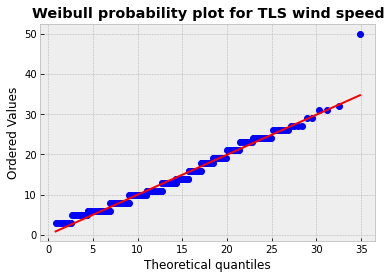

In [20]:
scipy.stats.probplot(wind, dist=fitted, plot=plt.figure().add_subplot(111))
plt.title("Weibull probability plot for TLS wind speed", weight="bold")
scipy.stats.kstest(wind, "weibull_min", args=(p0, p1, p2))

**Choosing a model**. The Kolmogorov-Smirnov distance statistic is a little less good for the Weibull distribution than for the lognormal distribution. The quantile-quantile plot shows that it fits the observations better except for one extreme point, perhaps an outlier, at the highest observed wind speed. If we were using our model for optimization purposes, around the most common wind speeds, we would select the Weibull distribution. If we are using the model for safety, where the highest wind speeds are the most dangerous, we would use a lognormal plot instead, because it has a better prediction of the observed highest wind speed. 